
Приклад виводу системи:
+--------+--------+---------------------+---------------------+--------------------------------------------+--------------------------------------------+--------------------------+--------------------+-----------+----------------+----------+---------------+-----------+----------------+-----------------------+--------------------------+-------------+
|  ID 1  |  ID 2  |   Термін 1 (Name)   |   Термін 2 (Name)   |               Організація 1                |               Організація 2                |        Продукт 1         |     Продукт 2      |  Name JW  |  Name Soundex  |  Org JW  |  Org Soundex  |  Prod JW  |  Prod Soundex  |  Damerau-Levenshtein  |  Ймовірність належності  |   Рішення   |
+========+========+=====================+=====================+============================================+============================================+==========================+====================+===========+================+==========+===============+===========+==

C:\Users\narus\AppData\Local\Temp\ipykernel_25172\3089872874.py:88: RuntimeWarning: divide by zero encountered in divide
  return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)
C:\Users\narus\AppData\Local\Temp\ipykernel_25172\3089872874.py:88: RuntimeWarning: invalid value encountered in divide
  return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)


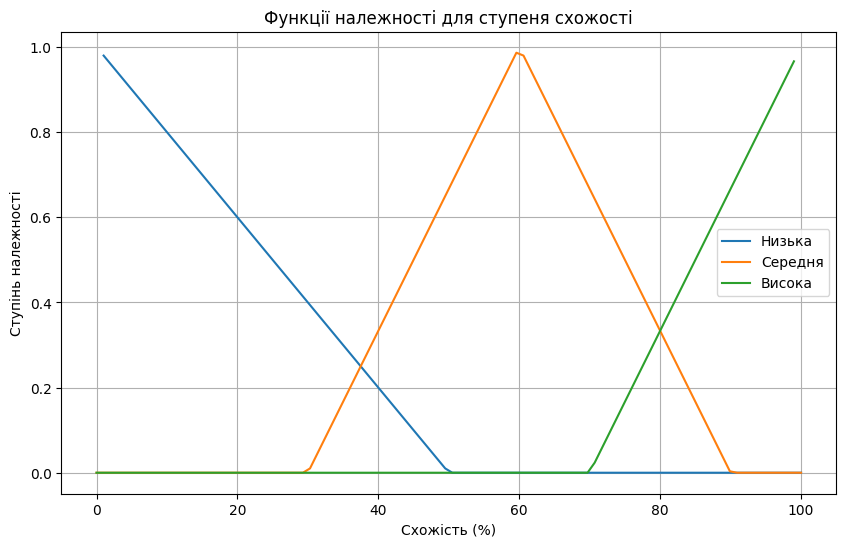

In [22]:
import pandas as pd
import numpy as np
from rapidfuzz import fuzz
import fuzzy
import matplotlib.pyplot as plt
from tabulate import tabulate
from Levenshtein import distance as levenshtein_distance

# Оновлений датасет з латиницею
data = {
    'ID': [1, 2, 3, 4, 5],
    'Name': ['Oleksandr Petrenko', 'O. Petrenko', 'Oleksander Petrenko', 'Petrenko Oleksandr', 'Olksandr Petrenko'],
    'Organization': ['NU Lvivska Politechnika', 'Lvivska Politechnika', 'National University "Lvivska Politechnika"', 'Lviv. Politekh.', 'NU LP'],
    'Product': ['Samsung Galaxy S22 Ultra', 'Samsung S22 Ultra', 'Galaxy S22-Ultra', 'Samsung Galaxy S22', 'Galaxy S22Ultra']
}

# Створення DataFrame
df = pd.DataFrame(data)

# Функція для обчислення Soundex
soundex = fuzzy.Soundex(4)
def soundex_similarity(str1, str2):
    return int(soundex(str1) == soundex(str2)) * 100

# Функція для обчислення Damerau-Levenshtein відстані
def damerau_levenshtein_distance(str1, str2):
    return levenshtein_distance(str1, str2)

# Функція для обчислення ймовірності належності на основі вагових коефіцієнтів
def calculate_similarity(name_jw, name_soundex, org_jw, org_soundex, prod_jw, prod_soundex):
    return round((name_jw * 0.4 + name_soundex * 0.1 +
                  org_jw * 0.2 + org_soundex * 0.1 +
                  prod_jw * 0.15 + prod_soundex * 0.05), 2)

# Функція для створення таблиці порівнянь між парами записів з усіма полями
def create_comparison_table(df, threshold=75):
    results = []

    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            name_jw = fuzz.token_sort_ratio(df.loc[i, 'Name'], df.loc[j, 'Name']) / 100
            name_soundex = soundex_similarity(df.loc[i, 'Name'], df.loc[j, 'Name']) / 100

            org_jw = fuzz.token_sort_ratio(df.loc[i, 'Organization'], df.loc[j, 'Organization']) / 100
            org_soundex = soundex_similarity(df.loc[i, 'Organization'], df.loc[j, 'Organization']) / 100

            prod_jw = fuzz.token_sort_ratio(df.loc[i, 'Product'], df.loc[j, 'Product']) / 100
            prod_soundex = soundex_similarity(df.loc[i, 'Product'], df.loc[j, 'Product']) / 100

            distance = damerau_levenshtein_distance(df.loc[i, 'Name'], df.loc[j, 'Name'])
            probability = calculate_similarity(name_jw, name_soundex, org_jw, org_soundex, prod_jw, prod_soundex)
            decision = "Належить" if probability * 100 >= threshold else "Не належить"

            results.append([
                df.loc[i, 'ID'], df.loc[j, 'ID'],
                df.loc[i, 'Name'], df.loc[j, 'Name'],
                df.loc[i, 'Organization'], df.loc[j, 'Organization'],
                df.loc[i, 'Product'], df.loc[j, 'Product'],
                round(name_jw, 2), round(name_soundex, 2),
                round(org_jw, 2), round(org_soundex, 2),
                round(prod_jw, 2), round(prod_soundex, 2),
                distance, f"{int(probability * 100)}%", decision
            ])

    headers = [
        "ID 1", "ID 2",
        "Термін 1 (Name)", "Термін 2 (Name)",
        "Організація 1", "Організація 2",
        "Продукт 1", "Продукт 2",
        "Name JW", "Name Soundex",
        "Org JW", "Org Soundex",
        "Prod JW", "Prod Soundex",
        "Damerau-Levenshtein", "Ймовірність належності", "Рішення"
    ]

    table = tabulate(results, headers=headers, tablefmt="grid", stralign="center", numalign="center")
    print("\nПриклад виводу системи:")
    print(table)

# Виклик функції для створення таблиці
create_comparison_table(df, threshold=65)

# Візуалізація функції належності для ступеня схожості
x = np.linspace(0, 100, 100)

def trimf(x, params):
    a, b, c = params
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

low = trimf(x, [0, 0, 50])
medium = trimf(x, [30, 60, 90])
high = trimf(x, [70, 100, 100])

plt.figure(figsize=(10, 6))
plt.plot(x, low, label='Низька')
plt.plot(x, medium, label='Середня')
plt.plot(x, high, label='Висока')
plt.title('Функції належності для ступеня схожості')
plt.xlabel('Схожість (%)')
plt.ylabel('Ступінь належності')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
!pip install Levenshtein

   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.5 kB 660.6 kB/s eta 0:00:01
   ------------------------------------- -- 92.2/98.5 kB 880.9 kB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 809.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
